In [1]:
import pandas as pd
import requests
import matplotlib.pyplot as plt

In [2]:
# Loading in Olympic data
olympics_data = "cleandata/clean_df.csv"

# Read the cleaned olympic data in cleandata folder

olympics_df = pd.read_csv(olympics_data)
olympics_df


,Unnamed: 0,ID,Name,Sex,Age,Height,Weight,Team,NOC,Games,...,Sport,Event,Medal,region,Row,FIPS,GENC,Population,Area (sq km),GDP
0,0,1,A Dijiang,M,24.0,180.0,80.0,China,CHN,1992 Summer,...,Basketball,Basketball Men's Basketball,NaN,China,6234,CH,CN,1182230625,9326410,4.270000e+11
1,1,6848,Bai Chongguang,M,21.0,184.0,83.0,China,CHN,1992 Summer,...,Boxing,Boxing Men's Light-Heavyweight,NaN,China,6234,CH,CN,1182230625,9326410,4.270000e+11
2,2,6854,Bai Mei,F,17.0,166.0,46.0,China,CHN,1992 Summer,...,Rhythmic Gymnastics,Rhythmic Gymnastics Women's Individual,NaN,China,6234,CH,CN,1182230625,9326410,4.270000e+11
3,3,11225,Bi Zhong,M,23.0,188.0,110.0,China,CHN,1992 Summer,...,Athletics,Athletics Men's Hammer Throw,NaN,China,6234,CH,CN,1182230625,9326410,4.270000e+11
4,4,17295,Cai Yanshu,M,28.0,169.0,79.0,China,CHN,1992 Summer,...,Weightlifting,Weightlifting Men's Light-Heavyweight,NaN,China,6234,CH,CN,1182230625,9326410,4.270000e+11
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
207558,207558,87277,Frans Ntaole,M,33.0,168.0,62.0,Lesotho,LES,1984 Summer,...,Athletics,Athletics Men's Marathon,NaN,Lesotho,17400,LT,LS,1519492,30355,3.331585e+08
207559,207559,98490,Gabashane Vincent Rakabaele,M,35.0,163.0,54.0,Lesotho,LES,1984 Summer,...,Athletics,Athletics Men's Marathon,NaN,Lesotho,17400,LT,LS,1519492,30355,3.331585e+08
207560,207560,122215,Lefa Tsapi,M,23.0,170.0,63.0,Lesotho,LES,1984 Summer,...,Boxing,Boxing Men's Welterweight,NaN,Lesotho,17400,LT,LS,1519492,30355,3.331585e+08
207561,207561,81698,Motsapi Moorosi,M,27.0,170.0,62.0,Lesotho,LES,1972 Summer,...,Athletics,Athletics Men's 100 metres,NaN,Lesotho,17388,LT,LS,1116779,30355,8.091583e+07


## Grouped by Country Review

In [3]:
countrypopulation_df = olympics_df[["region","Year","Event","Medal","Population","GDP","Area (sq km)"]]

countrypopulation_df["GDP"] = countrypopulation_df["GDP"].fillna(0)

countrypopulation_df["GDP"] = countrypopulation_df["GDP"].replace('[^.0-9]', '', regex=True).astype(float)

countrypopulation_df["Medal"]= countrypopulation_df["Medal"].replace(['Gold','Silver','Bronze'], 1, regex=True)

countrypopulation_df= countrypopulation_df.rename(columns = {"region":"Country"})

countrypopulation_df

<ipython-input-3-a7eddc4ca5c6>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  countrypopulation_df["GDP"] = countrypopulation_df["GDP"].fillna(0)
<ipython-input-3-a7eddc4ca5c6>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  countrypopulation_df["GDP"] = countrypopulation_df["GDP"].replace('[^.0-9]', '', regex=True).astype(float)
<ipython-input-3-a7eddc4ca5c6>:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value ins

,Country,Year,Event,Medal,Population,GDP,Area (sq km)
0,China,1992,Basketball Men's Basketball,NaN,1182230625,4.270000e+11,9326410
1,China,1992,Boxing Men's Light-Heavyweight,NaN,1182230625,4.270000e+11,9326410
2,China,1992,Rhythmic Gymnastics Women's Individual,NaN,1182230625,4.270000e+11,9326410
3,China,1992,Athletics Men's Hammer Throw,NaN,1182230625,4.270000e+11,9326410
4,China,1992,Weightlifting Men's Light-Heavyweight,NaN,1182230625,4.270000e+11,9326410
...,...,...,...,...,...,...,...
207558,Lesotho,1984,Athletics Men's Marathon,NaN,1519492,3.331585e+08,30355
207559,Lesotho,1984,Athletics Men's Marathon,NaN,1519492,3.331585e+08,30355
207560,Lesotho,1984,Boxing Men's Welterweight,NaN,1519492,3.331585e+08,30355
207561,Lesotho,1972,Athletics Men's 100 metres,NaN,1116779,8.091583e+07,30355


In [4]:
countrypopulation_df = olympics_df[["region","Year","Name","Medal","Population","GDP","Area (sq km)"]]

countrypopulation_df["GDP"] = countrypopulation_df["GDP"].fillna(0)

countrypopulation_df["GDP"] = countrypopulation_df["GDP"].replace('[^.0-9]', '', regex=True).astype(float)

countrypopulation_df["Medal"]= countrypopulation_df["Medal"].replace(['Gold','Silver','Bronze'], 1, regex=True)

countrypopulation_df= countrypopulation_df.rename(columns = {"region":"Country"})

countrypopulation_group = countrypopulation_df.groupby(["Country","Year"])

athletes = countrypopulation_group["Name"].count()
medals = countrypopulation_group["Medal"].sum()
countrypopulation = countrypopulation_group["Population"].mean()
GDP_country= countrypopulation_group["GDP"].mean()
area_country = countrypopulation_group["Area (sq km)"].max()

    
countrysuccess_df = pd.DataFrame({"Population":countrypopulation,"GDP":GDP_country,"Size (km)":area_country,"Total Athletes":athletes,"Total Medals":medals})
countrysuccess_df

<ipython-input-4-bf5147493e20>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  countrypopulation_df["GDP"] = countrypopulation_df["GDP"].fillna(0)
<ipython-input-4-bf5147493e20>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  countrypopulation_df["GDP"] = countrypopulation_df["GDP"].replace('[^.0-9]', '', regex=True).astype(float)
<ipython-input-4-bf5147493e20>:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value ins

Population           GDP  Size (km)  Total Athletes  \
Country     Year                                                        
Afghanistan 1960     9829450  5.377778e+08     652230              16   
            1964    10744167  8.000000e+08     652230               8   
            1968    11825320  1.373333e+09     652230               5   
            1972    13079460  1.595555e+09     652230               8   
            1980    15044289  3.641723e+09     652230              11   
...                      ...           ...        ...             ...   
Zimbabwe    2004    12277837  5.805598e+09     386847              14   
            2008    12508721  4.415703e+09     386847              16   
            2012    12974906  1.711485e+10     386847               9   
            2014    13251459  1.949552e+10     386847               2   
            2016    13600605  2.054868e+10     386847              31   

                  Total Medals  
Country     Year                
Afghanistan 1960           0.0  
            1964           0.0  
            1968           0.0  
            1972           0.0  
            1980           0.0  
...                        ...  
Zimbabwe    2004           3.0  
            2008           4.0  
            2012           0.0  
            2014           0.0  
            2016           0.0  

[2697 rows x 5 columns]

In [5]:
# # olympics_df = olympics_df.fillna("n/a")


# medals = pd.DataFrame({"Medal": olympics_df["Medal"]})
# medals = pd.get_dummies(medals)

countrysuccess_group = countrysuccess_df.groupby(["Country"])

athletes = countrysuccess_group["Total Athletes"].sum()
medals = countrysuccess_group["Total Medals"].sum()
countrypopulation = countrysuccess_group["Population"].mean()
GDP_country= countrysuccess_group["GDP"].mean()
area_country = countrysuccess_group["Size (km)"].max()

success = medals / athletes
    
country_df = pd.DataFrame({"Population":countrypopulation,"GDP":GDP_country,"Size (km)":area_country,"Total Athletes":athletes,"Total Medals":medals})



country_df["Medal Rate"] = success

country_df



,Population,GDP,Size (km),Total Athletes,Total Medals,Medal Rate
Country,,,,,,
Afghanistan,1.917494e+07,5.573067e+09,652230,73,2.0,0.027397
Albania,2.982092e+06,7.784581e+09,27398,70,0.0,0.000000
Algeria,2.690728e+07,8.144863e+10,2381740,551,17.0,0.030853
American Samoa,5.316233e+04,2.644444e+08,198,37,0.0,0.000000
Andorra,6.541841e+04,1.930462e+09,468,169,0.0,0.000000
...,...,...,...,...,...,...
"Virgin Islands, British",2.376980e+04,0.000000e+00,151,45,0.0,0.000000
"Virgin Islands, US",1.010624e+05,1.431750e+09,348,294,1.0,0.003401
Yemen,1.788188e+07,1.433562e+10,527968,48,0.0,0.000000


In [6]:
country_corr = country_df.corr()

country_corr

,Population,GDP,Size (km),Total Athletes,Total Medals,Medal Rate
Population,1.000000,0.459855,0.476722,0.270316,0.274046,0.313595
GDP,0.459855,1.000000,0.488405,0.689508,0.724130,0.468545
Size (km),0.476722,0.488405,1.000000,0.551636,0.664478,0.491859
Total Athletes,0.270316,0.689508,0.551636,1.000000,0.905429,0.720158
Total Medals,0.274046,0.724130,0.664478,0.905429,1.000000,0.712255
Medal Rate,0.313595,0.468545,0.491859,0.720158,0.712255,1.000000


In [13]:
highest_population = country_df.nlargest(50, 'Population')
lowest_population = country_df.nsmallest(50, 'Population')


highest_gdp = country_df.nlargest(50, 'GDP')
lowest_gdp = country_df.nsmallest(50, 'GDP')


largest_countries = country_df.nlargest(50, 'Size (km)')
smallest_countries = country_df.nsmallest(50, 'Population')

top_medals = country_df.nlargest(50, 'Total Medals')
top_medals

,Population,GDP,Size (km),Total Athletes,Total Medals,Medal Rate
Country,,,,,,
USA,2.618698e+08,8.462000e+12,9150541,12497,3658.0,0.292710
Russia,1.413216e+08,6.185238e+11,16377742,10468,3607.0,0.344574
Germany,7.986830e+07,1.942619e+12,348672,12805,3083.0,0.240765
Australia,1.756673e+07,5.169036e+11,7682300,6739,1173.0,0.174061
Italy,5.730724e+07,1.151833e+12,294140,7754,1004.0,0.129482
China,1.245402e+09,3.246750e+12,9326410,5040,989.0,0.196230
Canada,2.870657e+07,7.736509e+11,9093507,8021,974.0,0.121431
UK,5.863464e+07,1.448792e+12,241930,7397,878.0,0.118697
France,5.902405e+07,1.422059e+12,640427,7580,848.0,0.111873


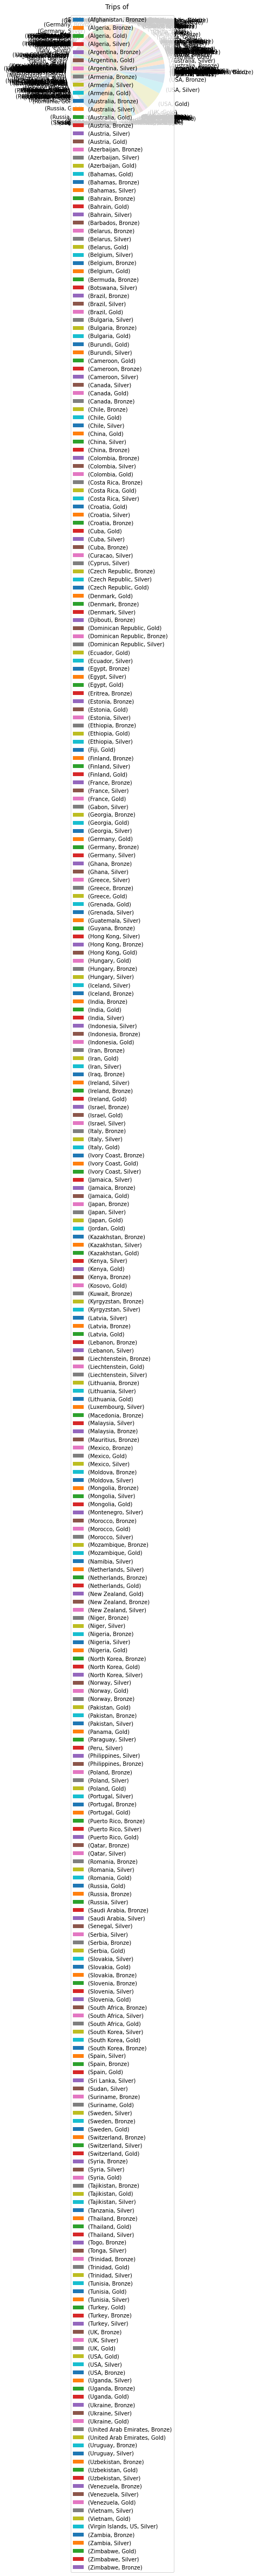

(-0.05500000000000001,
 0.05500000000000001,
 -0.05500000000000001,
 0.05500000000000001)

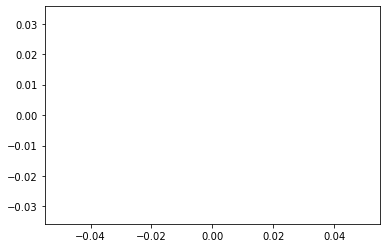

In [8]:
countrymedal_group = olympics_df.groupby(["region"])

medal_counts = countrymedal_group["Medal"].value_counts()
countrymedal_df = pd.DataFrame(medal_counts)
countrymedal_df = countrymedal_df.rename(columns={'region':'Country','Medal': 'Medal','Medal':'Total Medals'})
# countrymedal_df = pd.merge(countrymedal_df,olympics_df,on="region", how="inner")
# countrymedal_df = countrymedal_df[["region","Population","Total Medals"]]

# Create a pie chart based upon the trip duration of that single bike
bike_pie = countrymedal_df.plot(kind="pie", y='Total Medals', title=("Trips of "))
bike_pie.set_ylabel("Total Medals")

plt.show()
plt.axis("equal")

In [9]:
total_athletes = countrymedal_group["Sport"].value_counts()
topsportbycountry_df= pd.DataFrame(total_athletes)
topsportbycountry_df = topsportbycountry_df.rename(columns={'region':'Country','Sport': 'Sport','Sport':'Athletes'})
topsportbycountry_df = topsportbycountry_df.sort_values(["Athletes"], ascending=False)
topsportbycountry_df

Athletes
region   Sport                     
USA      Athletics             1747
Germany  Athletics             1516
         Gymnastics            1381
Russia   Athletics             1346
UK       Athletics             1303
...                             ...
Portugal Freestyle Skiing         1
         Diving                   1
         Boxing                   1
Cambodia Judo                     1
Zimbabwe Weightlifting            1

[3484 rows x 1 columns]

In [10]:
totalmedals = countrymedal_group["Medal"].count()
totalmedals_df = pd.DataFrame(totalmedals)
totalmedals_df = totalmedals_df.rename(columns={'region':'Country','Medal':'Total Medals'})
totalmedals_df = totalmedals_df.sort_values(["Total Medals"], ascending=False)
totalmedals_df

,Total Medals
region,
USA,3658
Russia,3607
Germany,3083
Australia,1173
Italy,1004
...,...
Papua New Guinea,0
Palestine,0
Palau,0


In [11]:
summervswinter = countrymedal_group["Season"].value_counts()
season_df = pd.DataFrame(summervswinter)
season_df = season_df.rename(columns={'region':'Country','Season':'Season','Season':'Athletes'})
season_df

Athletes
region             Season          
Afghanistan        Summer        73
Albania            Summer        63
                   Winter         7
Algeria            Summer       539
                   Winter        12
...                             ...
Virgin Islands, US Winter        55
Yemen              Summer        48
Zambia             Summer       183
Zimbabwe           Summer       319
                   Winter         2

[314 rows x 1 columns]